<a href="https://colab.research.google.com/github/TheBarmaEffect/Assignment-Interview-/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_Test.csv')

# Separate features and target variable
y_train = train_data['Application Status']
X_train = train_data.drop(columns=['Application Status'])
X_test = test_data.copy()


In [9]:
def convert_date_columns(df):
    if 'APPLICATION LOGIN DATE' in df.columns:
        df['APPLICATION LOGIN DATE'] = pd.to_datetime(df['APPLICATION LOGIN DATE'], infer_datetime_format=True, errors='coerce')
        df['APPLICATION LOGIN YEAR'] = df['APPLICATION LOGIN DATE'].dt.year
        df['APPLICATION LOGIN MONTH'] = df['APPLICATION LOGIN DATE'].dt.month
        df['APPLICATION LOGIN DAY'] = df['APPLICATION LOGIN DATE'].dt.day
        df.drop(columns=['APPLICATION LOGIN DATE'], inplace=True)

    if 'DOB' in df.columns:
        df['DOB'] = pd.to_datetime(df['DOB'], infer_datetime_format=True, errors='coerce')
        df['DOB YEAR'] = df['DOB'].dt.year
        df['DOB MONTH'] = df['DOB'].dt.month
        df['DOB DAY'] = df['DOB'].dt.day
        df.drop(columns=['DOB'], inplace=True)

# Apply the conversion to both datasets
convert_date_columns(X_train)
convert_date_columns(X_test)


<ipython-input-9-b1da6d206138>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['APPLICATION LOGIN DATE'] = pd.to_datetime(df['APPLICATION LOGIN DATE'], infer_datetime_format=True, errors='coerce')
<ipython-input-9-b1da6d206138>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DOB'] = pd.to_datetime(df['DOB'], infer_datetime_format=True, errors='coerce')
<ipython-input-9-b1da6d206138>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pan

In [10]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()


In [11]:
# Numeric transformation pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical transformation pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [12]:
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42)
}


In [13]:
results = {}
for model_name, model in models.items():
    # Create a pipeline that combines preprocessing and the model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[model_name] = cv_scores.mean()
    print(f'{model_name} - Cross-validation Accuracy: {cv_scores.mean():.4f}')

# Identify the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputati

Random Forest - Cross-validation Accuracy: 0.8427


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputati

Gradient Boosting - Cross-validation Accuracy: 0.8442


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputati

Logistic Regression - Cross-validation Accuracy: 0.8632


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.a23games']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputati

Support Vector Machine - Cross-validation Accuracy: 0.8574
Best model: Logistic Regression with accuracy 0.8632


In [14]:
# Train the best model on the entire training data
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', best_model)])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DEALER ID', 'mobile',
                                                   'TOTAL ASSET COST',
                                                   'ASSET MODEL NO',
                                                   'APPLIED AMOUNT', 'AGE',
                                                   'Phone Social '
                                                   'Premium.a23games',
                                                   'Phone Social '
                                                   'Premium.amazon',
                                                   'Phone Social Premium.byjus',
                                                   'Phone Social '
                                                   'Premium.flipkart',
                                                   'Phone Soc...
                                                   'AADHAR VERIFIED',
                                                   'Cibil Score', 'DEALER NAME',
                                                   'ASSET CTG',
                                                   'PRIMARY ASSET MAKE',
                                                   'Primary Asset Model No',
                                                   'Personal Email Address',
                                                   'MARITAL STATUS', 'GENDER',
                                                   'ADDRESS TYPE',
                                                   'EMPLOY CONSTITUTION',
                                                   'EMPLOYER NAME',
                                                   'EMPLOYER TYPE', 'Pan Name',
                                                   'name', 'vpa', 'upi_name',
                                                   'phone_phoneFootprintStrengthOverall'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [15]:
# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train on the split data
clf.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model's performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Validation Accuracy: 0.865
Confusion Matrix:
 [[1163  164]
 [ 106  567]]
Classification Report:
               precision    recall  f1-score   support

    APPROVED       0.92      0.88      0.90      1327
    DECLINED       0.78      0.84      0.81       673

    accuracy                           0.86      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.87      0.86      0.87      2000



In [21]:
# Predict on the test set
test_predictions = clf.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'UID': test_data['UID'],
    'Prediction': test_predictions
})

# Save the submission file
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/predictions.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Phone Social Premium.rummycircle']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


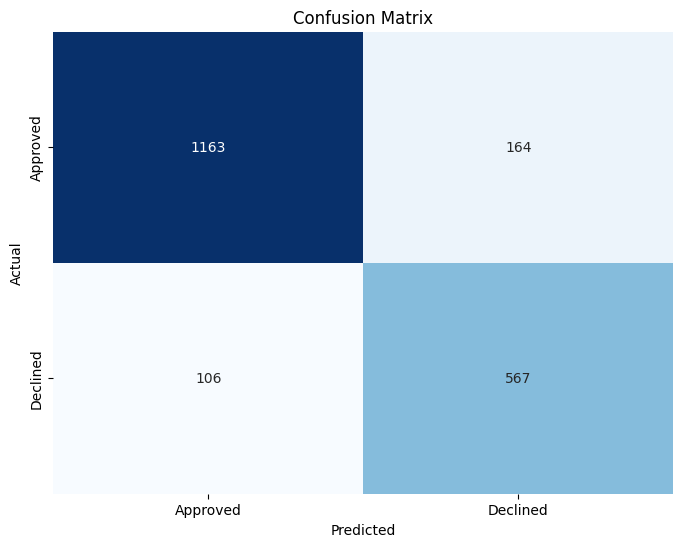

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_val and y_val_pred are available from the previous steps

# Create the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Approved', 'Declined'], yticklabels=['Approved', 'Declined'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



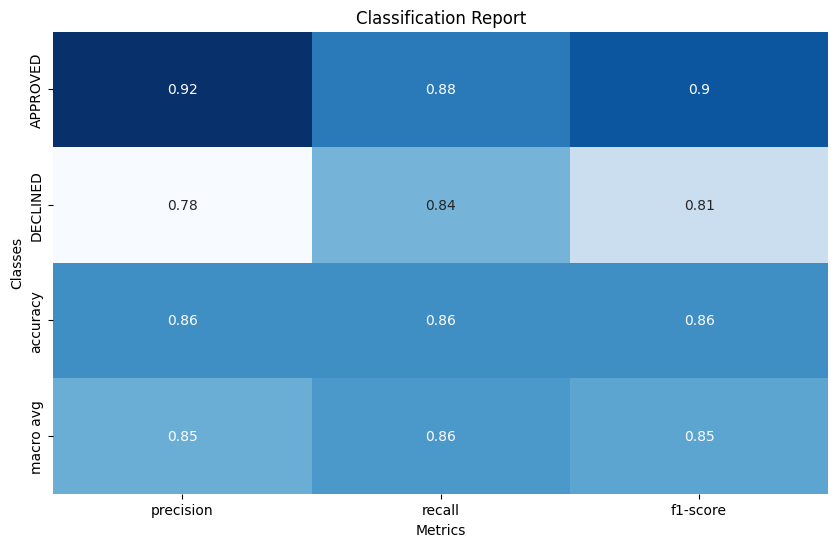

In [20]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_val and y_val_pred are available

# Generate classification report as a dictionary
class_report_dict = classification_report(y_val, y_val_pred, output_dict=True)

# Convert the dictionary to a DataFrame for easier plotting
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()
